In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel, sigmoid_kernel, cosine_similarity


In [3]:
def k_means(k,X):
    # Initialize centroids randomly
    d = X.shape[1]
    centroids =X[np.random.randint(0,X.shape[0],k)]
    # Initialize cluster assignments
    clusters = np.random.randint(0,k,X.shape[0])
    # Initialize error
    error = 1
    max_iter =10000
    curr_iter = 0
    
    while error > 0.0001 and curr_iter < max_iter:
        old_centroids = centroids.copy()
        # Assign each point to the closest centroid
        #make it numpy style and no for loop
        distances = np.linalg.norm(X[:,None]-centroids,axis=2)
        clusters = np.argmin(distances,axis=1)
        #onehot of clusters
        clusters_onehot = np.zeros((X.shape[0],k))
        clusters_onehot[np.arange(X.shape[0]),clusters] = 1
        centroids = (clusters_onehot.T@X)/(np.sum(clusters_onehot,axis=0)[:,None] + 0.0001)
        # Compute error
        error = np.linalg.norm(centroids-old_centroids)
        curr_iter +=1
        
    return centroids, clusters
def spectral_k_means(K,k,dim=None):
    dim = k if dim is None else dim
    eigval,eigvec = np.linalg.eigh(K)
    dim = min(dim,(eigval>0.001).sum())
    centroids,clusters= k_means(k,eigvec[:,-dim:])
    return centroids,clusters


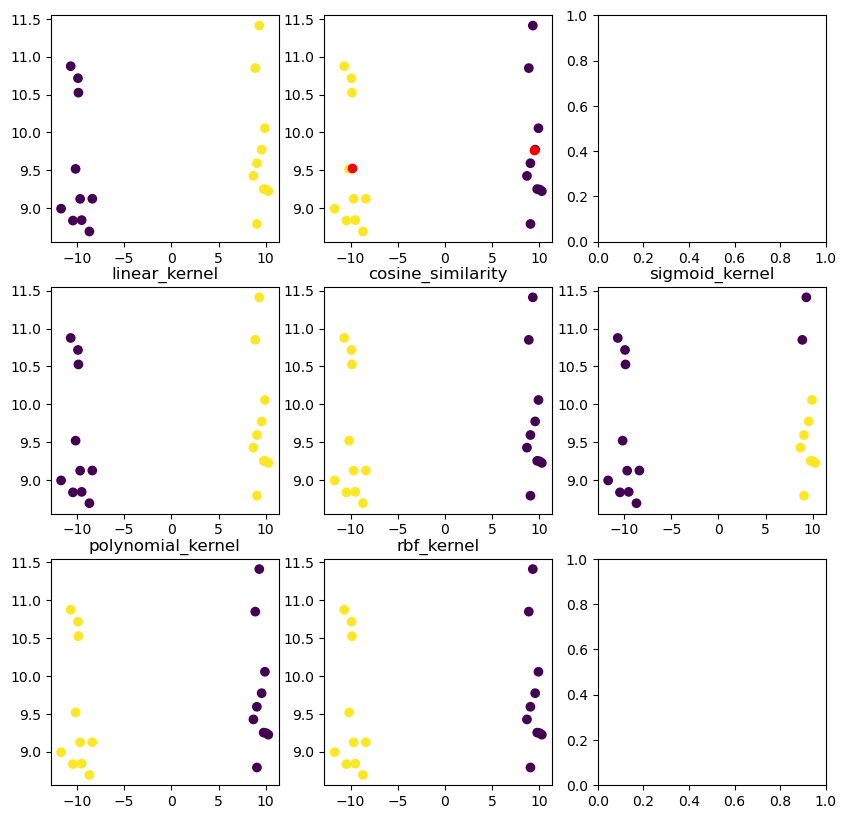

In [109]:
X1 = np.random.multivariate_normal([10,10],[[1,0],[0,1]],10)
X2 = np.random.multivariate_normal([-10,10],[[1,0],[0,1]],10)
X = np.concatenate((X1,X2),axis=0)
y = np.concatenate((np.ones(10),-np.ones(10)),axis=0)


fig ,ax = plt.subplots(3,3,figsize=(10,10))
ax[0,0].scatter(X[:,0],X[:,1],c=y)

for i in range(1):
    centroids,clusters = k_means(2,X)
    ax[0,1].scatter(X[:,0],X[:,1],c=clusters)
    ax[0,1].scatter(centroids[:,0],centroids[:,1],c='r')
    for j,(kernel,kwargs) in enumerate([(linear_kernel,{}), (cosine_similarity,{}),(sigmoid_kernel,{"gamma":1}), (polynomial_kernel,{"degree":2}), (rbf_kernel,{"gamma":0.5})]):
        K = kernel(X,X,**kwargs)
        x,y = j//3+1,j%3
        centroids,clusters= spectral_k_means(K,2,2)
        ax[x,y].scatter(X[:,0],X[:,1],c=clusters)
        ax[x,y].set_title(kernel.__name__)

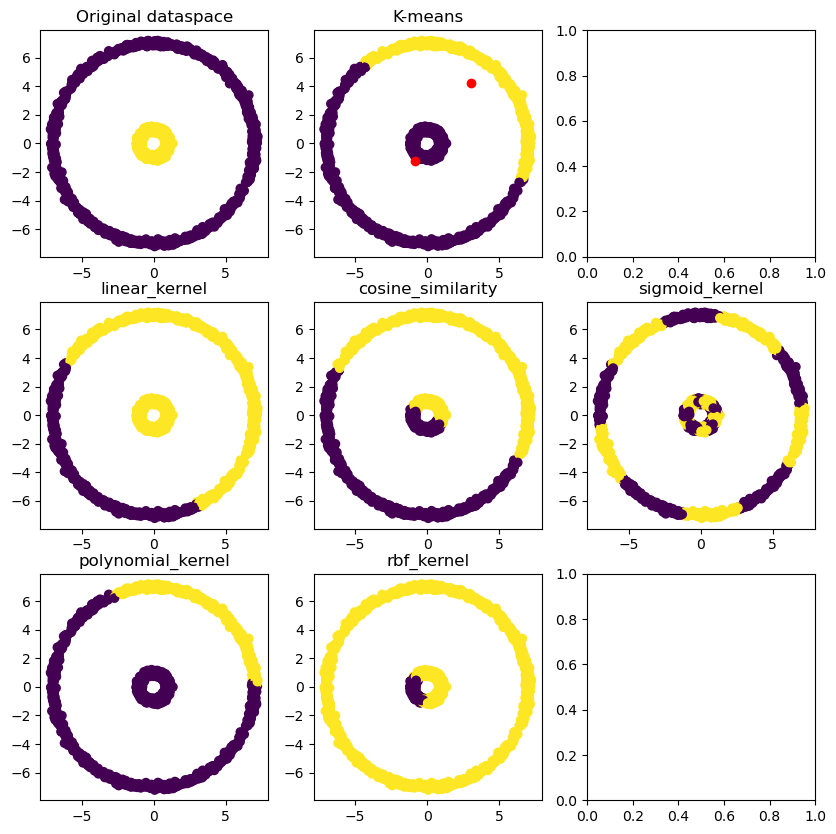

In [119]:
#circle
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel, sigmoid_kernel, cosine_similarity
N = 1000
d = np.random.rand(N)
radius = np.random.normal(1,0.1,N)
X1 = np.vstack((np.cos(2*np.pi*d)*radius,np.sin(2*np.pi*d)*radius))
d = np.random.rand(N)
radius = np.random.normal(7,0.1,N)
X2 = np.vstack((np.cos(2*np.pi*d)*radius,np.sin(2*np.pi*d)*radius))
X = np.hstack((X1,X2)).T
y = np.concatenate((np.ones(N),-np.ones(N)),axis=0)



fig ,ax = plt.subplots(3,3,figsize=(10,10))
ax[0,0].scatter(X[:,0],X[:,1],c=y)
ax[0,0].set_title("Original dataspace")
for i in range(1):
    centroids,clusters = k_means(2,X)
    ax[0,1].scatter(X[:,0],X[:,1],c=clusters)
    ax[0,1].scatter(centroids[:,0],centroids[:,1],c='r')
    ax[0,1].set_title("K-means")
    #all rbs kernel with different gamma
    for j,(kernel,kwargs) in  enumerate([(linear_kernel,{}), (cosine_similarity,{}),(sigmoid_kernel,{"gamma":1}), (polynomial_kernel,{"degree":2,"gamma":2}), (rbf_kernel,{"gamma":2})]):
        K = kernel(X,X,**kwargs)
        x,y = j//3+1,j%3
        centroids,clusters= spectral_k_means(K,2,4)
        ax[x,y].scatter(X[:,0],X[:,1],c=clusters)
        ax[x,y].set_title(kernel.__name__)

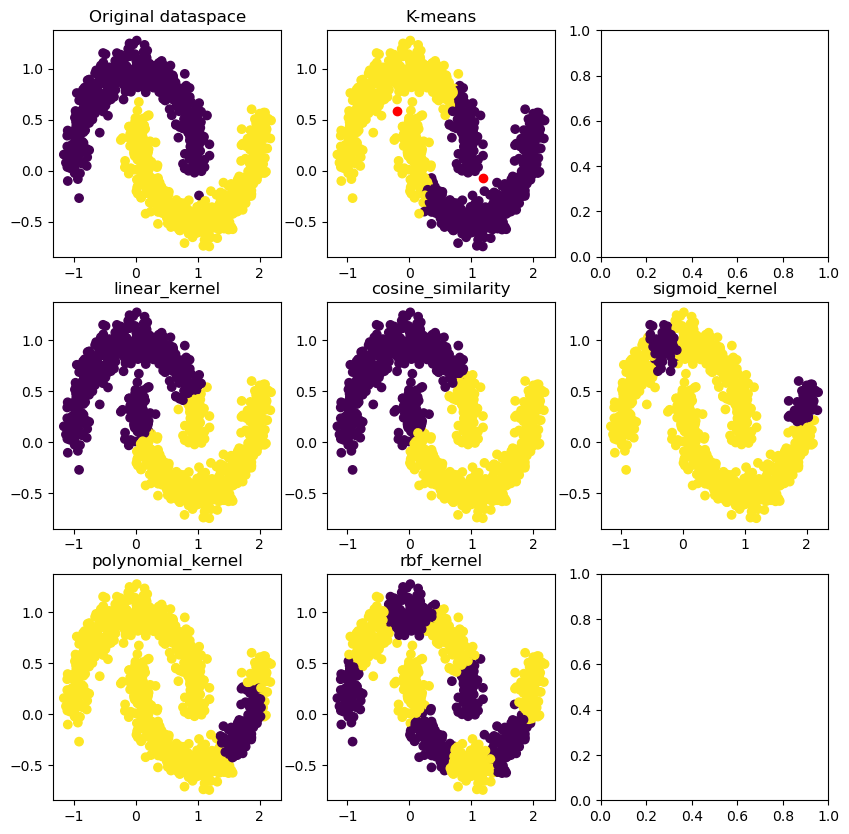

In [120]:
#2 moons
from sklearn.datasets import make_moons
X,y = make_moons(1000,noise=0.1)
fig ,ax = plt.subplots(3,3,figsize=(10,10))
ax[0,0].scatter(X[:,0],X[:,1],c=y)
ax[0,0].set_title("Original dataspace")
for i in range(1):
    centroids,clusters = k_means(2,X)
    ax[0,1].scatter(X[:,0],X[:,1],c=clusters)
    ax[0,1].scatter(centroids[:,0],centroids[:,1],c='r')
    ax[0,1].set_title("K-means")
    #all rbs kernel with different gamma
    for j,(kernel,kwargs) in enumerate([(linear_kernel,{}), (cosine_similarity,{}),(sigmoid_kernel,{"gamma":2}), (polynomial_kernel,{"degree":10,"gamma":1}), (rbf_kernel,{"gamma":6})]):
        K = kernel(X,X,**kwargs)
        x,y = j//3+1,j%3
        centroids,clusters= spectral_k_means(K,2,10)
        ax[x,y].scatter(X[:,0],X[:,1],c=clusters)
        ax[x,y].set_title(kernel.__name__)

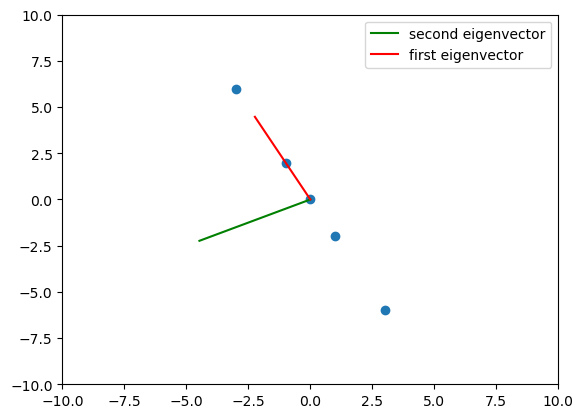

In [77]:
X = [(0, 0), (-1, 2), (-3, 6), (1, -2), (3, -6)]
X = np.array(X)
eighval,eigvec = np.linalg.eigh(X.T@X)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(X[:,0],X[:,1])
plt.plot([0,eigvec[0,0]*5],[0,eigvec[1,0]*5],c='g',label='second eigenvector')
plt.plot([0,eigvec[0,-1]*5],[0,eigvec[1,-1]*5],c='r',label='first eigenvector')
plt.legend()

In [30]:
#load data from mat files
import scipy.io as sio
data = sio.loadmat("USPS.mat")
X = data["A"]
y =data["L"]

Reconstrucrion error for p = 10 is 396.0335125965828
Reconstrucrion error for p = 50 is 202.67096672205
Reconstrucrion error for p = 100 is 119.5912881461847
Reconstrucrion error for p = 200 is 37.04646657473325


<Figure size 640x480 with 0 Axes>

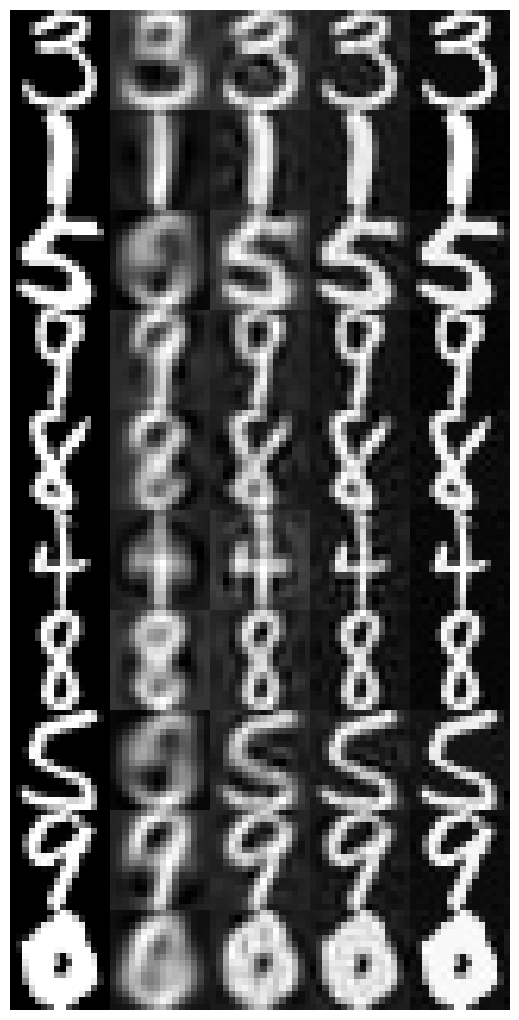

In [61]:
import random
from matplotlib import gridspec


U,S,Vt = np.linalg.svd(X)
plt.subplots_adjust(wspace=0.1)
nrow = 10
ncol = 5

fig = plt.figure(figsize=(ncol+1, nrow+1)) 

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 


for j in range(10):
    k =random.randint(0,X.shape[0]-1)
    ax= plt.subplot(gs[j,0])
    ax.imshow(X[k].reshape(16,16),cmap="gray")
    ax.axis("off")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    for i,p in enumerate([10,50,100,200]):
        X_10 = U[:,:p]@np.diag(S[:p])@Vt[:p,:]
        ax = plt.subplot(gs[j,i+1])
        if j ==0:
            print("Reconstrucrion error for p = {} is {}".format(p,np.linalg.norm(X-X_10)))
        ax.imshow(X_10[k].reshape(16,16),cmap="gray")
        ax.axis("off")
        ax.set_xticklabels([])
        ax.set_yticklabels([])

'\x08egin{bmatrix} 0.0 & 0.5 \\0.0 & 0.5 \\0.0 & 0.5 \\0.0 & 0.5 \\0.5 & 0.0 \\0.5 & 0.0 \\0.5 & 0.0 \\0.5 & 0.0\\end{bmatrix}'

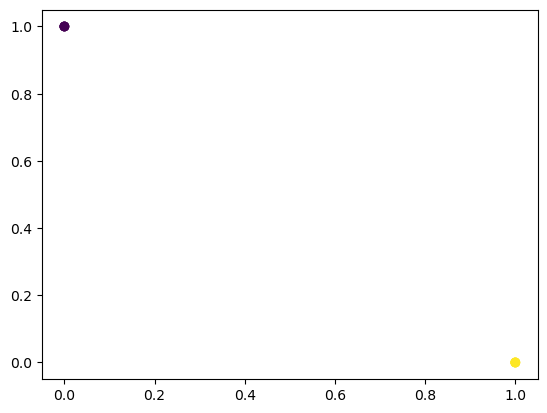

In [77]:
X1 = np.random.multivariate_normal([1,0],[[0,0],[0,0]],4)
X2 = np.random.multivariate_normal([0,1],[[0,0],[0,0]],4)
X = np.concatenate((X1,X2),axis=0)
y = np.concatenate((np.ones(4),-np.ones(4)),axis=0)

plt.scatter(X[:,0],X[:,1],c=y)

def convert_to_latex_matrix(M):
    return "\begin{bmatrix} " + " \\".join([" & ".join([str(round(x,2)) for x in row]) for row in M]) + "\end{bmatrix}"
convert_to_latex_matrix(abs(np.linalg.eigh(X@X.T)[1][:,-2:]))